In [1]:
import pandas as pd
import pylab as pl
import numpy as np

In [8]:
COVID19NA = pd.read_csv('COVID-19_World.csv')
COVID19NA.head()

,COUNTY_NAME,PEOPLE_POSITIVE_CASES_COUNT,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,NaN,167,New Brunswick,2020-07-14,America,Public Health Agency of Canada,0,NaN,CAN,Canada,CA,1,2
1,NaN,36,Prince Edward Island,2020-07-14,America,Public Health Agency of Canada,0,NaN,CAN,Canada,CA,1,0
2,NaN,5,Northwest Territories,2020-07-14,America,Public Health Agency of Canada,0,NaN,CAN,Canada,CA,0,0
3,NaN,11,Yukon,2020-07-14,America,Public Health Agency of Canada,0,NaN,CAN,Canada,CA,0,0
4,NaN,314,Manitoba,2020-07-08,America,Public Health Agency of Canada,0,NaN,CAN,Canada,CA,0,7


In [9]:
print(COVID19NA['COUNTRY_SHORT_NAME'].values)

['Canada' 'Canada' 'Canada' ... 'United States' 'United States'
 'United States']


In [10]:
COVID19NA.shape

(609958, 13)

In [11]:
COVID19NA.isnull().sum()

COUNTY_NAME                        42182
PEOPLE_POSITIVE_CASES_COUNT            0
PROVINCE_STATE_NAME                40194
REPORT_DATE                            0
CONTINENT_NAME                         0
DATA_SOURCE_NAME                       0
PEOPLE_DEATH_NEW_COUNT                 0
COUNTY_FIPS_NUMBER                 51862
COUNTRY_ALPHA_3_CODE                   0
COUNTRY_SHORT_NAME                     0
COUNTRY_ALPHA_2_CODE                 198
PEOPLE_POSITIVE_NEW_CASES_COUNT        0
PEOPLE_DEATH_COUNT                     0
dtype: int64

In [12]:
#Deleteing/dropping some columns with NA/null cells
columns_to_delete = ['COUNTY_FIPS_NUMBER','COUNTRY_ALPHA_2_CODE'] 
COVID19NA.drop(columns_to_delete, inplace=True, axis=1)
COVID19NA.head()

,COUNTY_NAME,PEOPLE_POSITIVE_CASES_COUNT,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,NaN,167,New Brunswick,2020-07-14,America,Public Health Agency of Canada,0,CAN,Canada,1,2
1,NaN,36,Prince Edward Island,2020-07-14,America,Public Health Agency of Canada,0,CAN,Canada,1,0
2,NaN,5,Northwest Territories,2020-07-14,America,Public Health Agency of Canada,0,CAN,Canada,0,0
3,NaN,11,Yukon,2020-07-14,America,Public Health Agency of Canada,0,CAN,Canada,0,0
4,NaN,314,Manitoba,2020-07-08,America,Public Health Agency of Canada,0,CAN,Canada,0,7


In [13]:
COVID19NA.dtypes

COUNTY_NAME                        object
PEOPLE_POSITIVE_CASES_COUNT         int64
PROVINCE_STATE_NAME                object
REPORT_DATE                        object
CONTINENT_NAME                     object
DATA_SOURCE_NAME                   object
PEOPLE_DEATH_NEW_COUNT              int64
COUNTRY_ALPHA_3_CODE               object
COUNTRY_SHORT_NAME                 object
PEOPLE_POSITIVE_NEW_CASES_COUNT     int64
PEOPLE_DEATH_COUNT                  int64
dtype: object

In [14]:
COVID19NA['REPORT_DATE'].head()   

0    2020-07-14
1    2020-07-14
2    2020-07-14
3    2020-07-14
4    2020-07-08
Name: REPORT_DATE, dtype: object

In [15]:
#converting the report_dat to datetime stamp datatype
COVID19NA['REPORT_DATE'] = pd.to_datetime(COVID19NA['REPORT_DATE'])  
COVID19NA['REPORT_DATE'].head()

0   2020-07-14
1   2020-07-14
2   2020-07-14
3   2020-07-14
4   2020-07-08
Name: REPORT_DATE, dtype: datetime64[ns]

In [16]:
#confirming the change
COVID19NA.dtypes

COUNTY_NAME                                object
PEOPLE_POSITIVE_CASES_COUNT                 int64
PROVINCE_STATE_NAME                        object
REPORT_DATE                        datetime64[ns]
CONTINENT_NAME                             object
DATA_SOURCE_NAME                           object
PEOPLE_DEATH_NEW_COUNT                      int64
COUNTRY_ALPHA_3_CODE                       object
COUNTRY_SHORT_NAME                         object
PEOPLE_POSITIVE_NEW_CASES_COUNT             int64
PEOPLE_DEATH_COUNT                          int64
dtype: object

In [17]:
#Checking the datestamp
mask = (COVID19NA['REPORT_DATE'] > '2019-12-31') & (COVID19NA['REPORT_DATE'] <= '2020-12-31') 
COVID19NA.loc[mask].shape

(609755, 11)

In [18]:
#drop duplicate rows
#COVID19NA.drop_duplicates(inplace=True)
#don't need to drop duplicate rows
COVID19NA.shape

(609958, 11)

In [19]:
COVID19NA.isnull().sum()

COUNTY_NAME                        42182
PEOPLE_POSITIVE_CASES_COUNT            0
PROVINCE_STATE_NAME                40194
REPORT_DATE                            0
CONTINENT_NAME                         0
DATA_SOURCE_NAME                       0
PEOPLE_DEATH_NEW_COUNT                 0
COUNTRY_ALPHA_3_CODE                   0
COUNTRY_SHORT_NAME                     0
PEOPLE_POSITIVE_NEW_CASES_COUNT        0
PEOPLE_DEATH_COUNT                     0
dtype: int64

In [20]:
COVID19NA.describe()

,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
count,6.099580e+05,609958.000000,609958.000000,609958.000000
mean,1.033965e+03,0.947364,21.807833,57.729763
std,1.579638e+04,19.331018,405.639421,1010.441919
min,0.000000e+00,-1918.000000,-29726.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,0.000000
50%,4.000000e+00,0.000000,0.000000,0.000000
75%,5.900000e+01,0.000000,1.000000,1.000000
max,1.926824e+06,2004.000000,54771.000000,74133.000000


# Visualization

In [21]:
import matplotlib.pyplot as plt


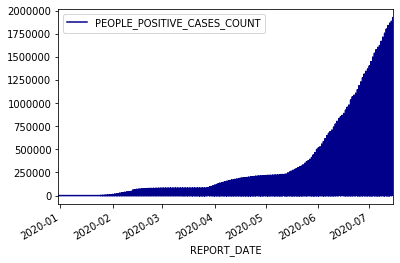

In [22]:
plot1 = COVID19NA.plot(x='REPORT_DATE',
                      y='PEOPLE_POSITIVE_CASES_COUNT',
                      c='DarkBlue')

In [23]:
import seaborn as sns

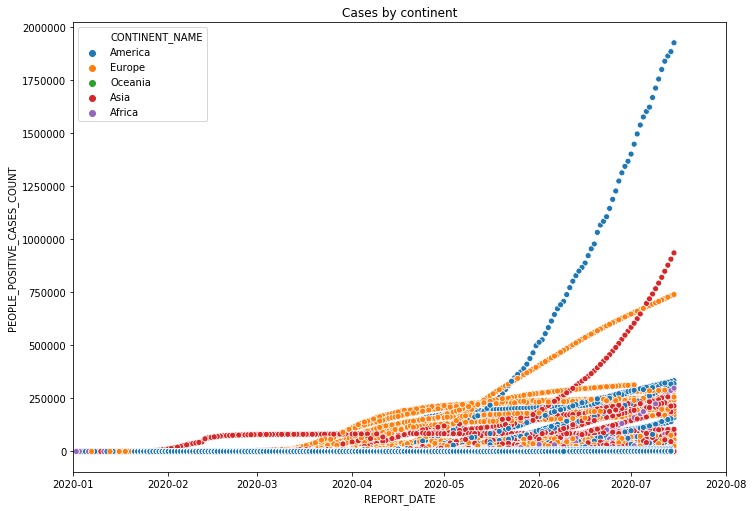

In [24]:
#plot by country
fig, ax = plt.subplots()
#size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=COVID19NA, x="REPORT_DATE", y="PEOPLE_POSITIVE_CASES_COUNT", hue="CONTINENT_NAME", ax=ax)
#palette='nipy_spectral')
#set limit of the report date on x axis
ax.set(xlim=('2020-01', '2020-08'))
#setting the title of the figure
ax.set(title=("COVID-19 cases by continent"))

#save file and image, remember to rename file name otherwise, it will rewrite
plt.savefig('COVID_19_1.png')
plt.show()

In [25]:
countries = sorted(COVID19NA['COUNTRY_SHORT_NAME'].unique())
print(len(countries))

205


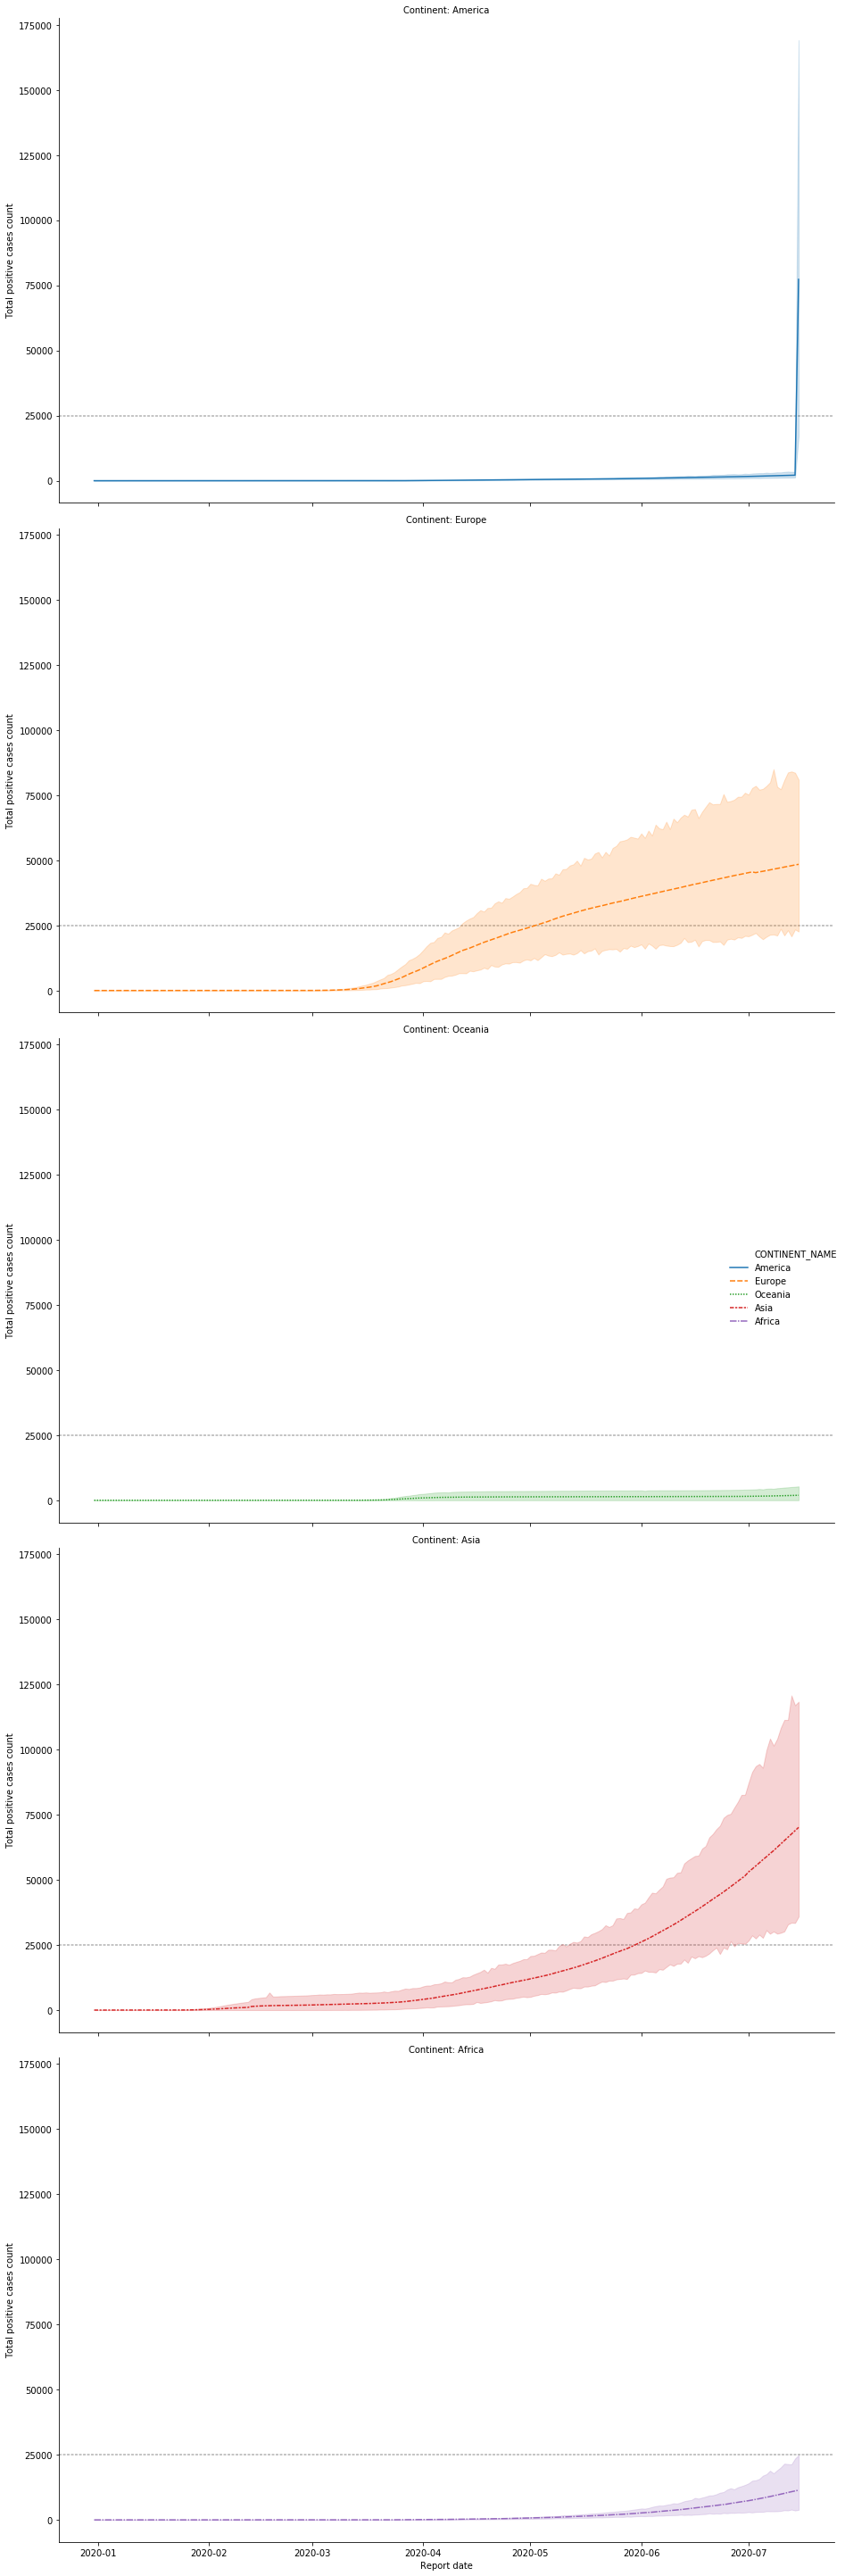

In [26]:
#Plot total positive case count by continent 
P2=sns.relplot(data=COVID19NA, x="REPORT_DATE", y="PEOPLE_POSITIVE_CASES_COUNT", hue="CONTINENT_NAME", style="CONTINENT_NAME",
            col="CONTINENT_NAME", col_wrap=1,kind="line", height=8, aspect=1.4)
(P2.map(plt.axhline, y=25000, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Report date", "Total positive COVID-19 cases count")
      .set_titles("Continent: {col_name}"))
plt.savefig('COVID_19_2.png')

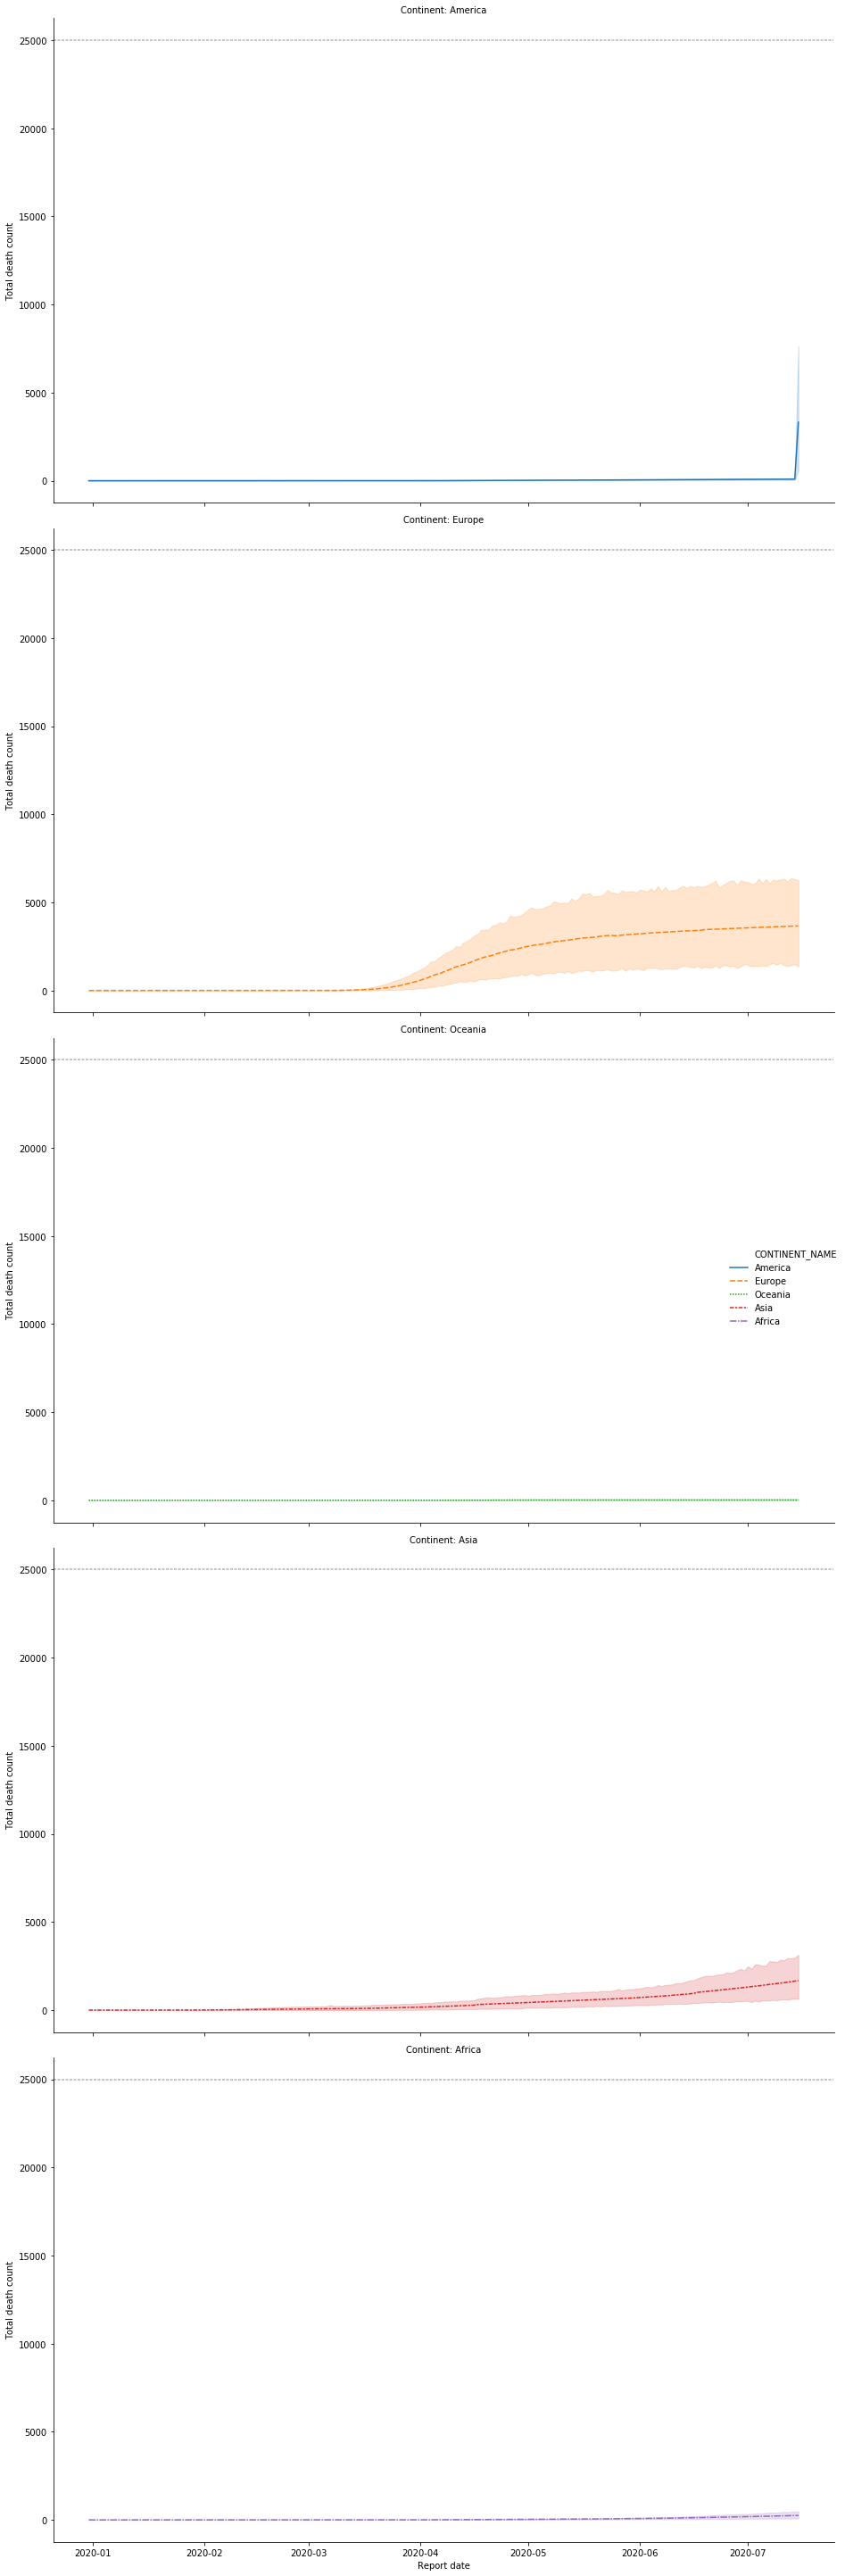

In [27]:
#Plot total death count by continent 
P2=sns.relplot(data=COVID19NA, x="REPORT_DATE", y="PEOPLE_DEATH_COUNT", hue="CONTINENT_NAME", style="CONTINENT_NAME",
            col="CONTINENT_NAME", col_wrap=1,kind="line", height=8, aspect=1.4)
(P2.map(plt.axhline, y=25000, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Report date", "Total death count")
      .set_titles("Continent: {col_name}"))
plt.savefig('COVID_19_3.png')

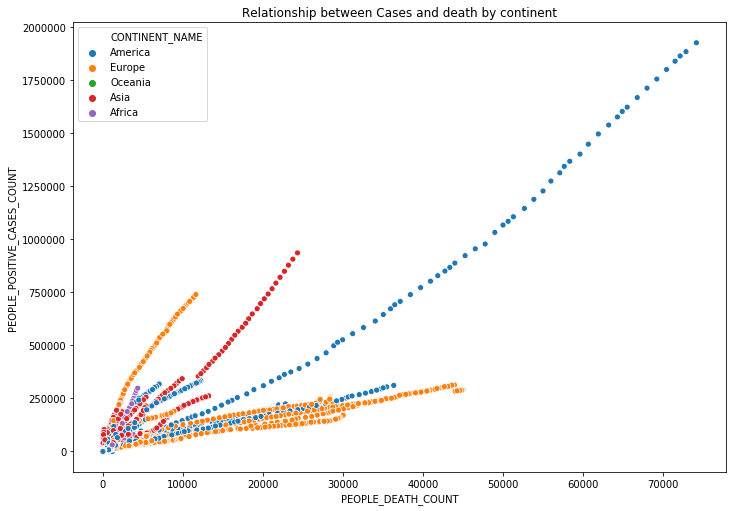

In [28]:
#Linear regression bewtween death and new positiive cases using default
#plot by country
fig, ax = plt.subplots()
#size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=COVID19NA, x="PEOPLE_DEATH_COUNT", y="PEOPLE_POSITIVE_CASES_COUNT", hue="CONTINENT_NAME", ax=ax)

#setting the title of the figure
ax.set(title=("Relationship between Covid-19 cases and death by continent"))

#save file and image, remember to rename file name otherwise, it will rewrite
plt.savefig('COVID_19_4.png')
plt.show()

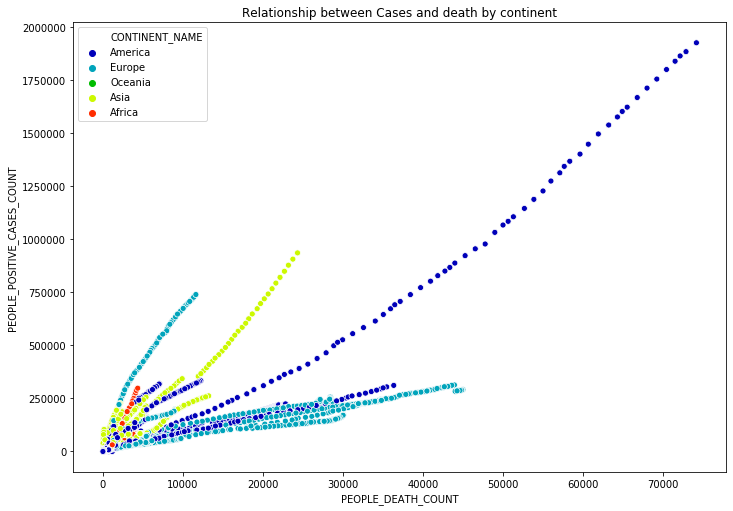

In [29]:
#Linear regression bewtween death and new positiive cases using nipy-spectral pattern
#plot by country
fig, ax = plt.subplots()
#size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=COVID19NA, x="PEOPLE_DEATH_COUNT", y="PEOPLE_POSITIVE_CASES_COUNT", hue="CONTINENT_NAME", ax=ax, palette='nipy_spectral')

#setting the title of the figure
ax.set(title=("Relationship between COVID-19 cases and death by continent"))

#save file and image, remember to rename file name otherwise, it will rewrite
plt.savefig('COVID_19_5.png')
plt.show()

### Looks like there maybe a linear relationship between the death count and new cases.


# Splitting data into training and test.

In [30]:
#Splitting data into testing and training data for a linear regression model
#I'm spliting data by the ratio of 80:20 (Train : Test) based on the Pareto principle.

splt = np.random.rand(len(COVID19NA)) < 0.8
trainC19 = COVID19NA[splt]
testC19 = COVID19NA[~splt]

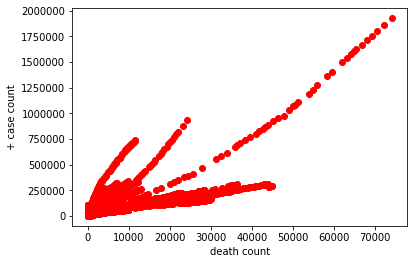

In [31]:
#Visualizing training data
plt.scatter(trainC19.PEOPLE_DEATH_COUNT, trainC19.PEOPLE_POSITIVE_CASES_COUNT,  color='red')
plt.xlabel("COVID-19 death count")
plt.ylabel("+ COVID-19 case count")
plt.show()

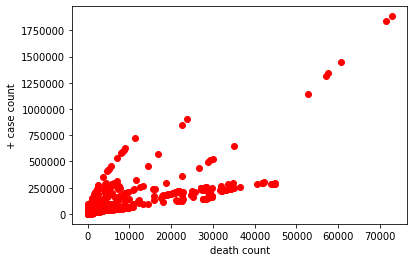

In [32]:
#Visualizing testing data
plt.scatter(testC19.PEOPLE_DEATH_COUNT, testC19.PEOPLE_POSITIVE_CASES_COUNT,  color='red')
plt.xlabel("COVID-19 death count")
plt.ylabel("+ COVID-19 case count")
plt.show()

# Running the linear regression on the training data

In [33]:
#from sklearn.linear_model import LinearRegression
from sklearn import linear_model
regr1 = linear_model.LinearRegression()
trainC19_x = np.asanyarray(trainC19[['PEOPLE_DEATH_COUNT']])
trainC19_y = np.asanyarray(trainC19[['PEOPLE_POSITIVE_CASES_COUNT']])
regr1.fit (trainC19_x, trainC19_y)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

Coefficients:  [[12.38329296]]
Intercept:  [322.93957219]


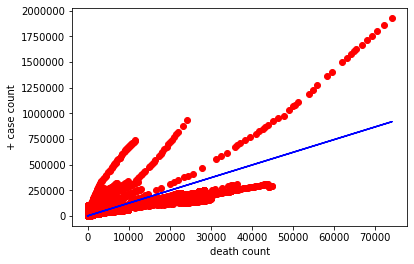

In [34]:
#Visualizing the regression line
#Y=mX+b


plt.scatter(trainC19.PEOPLE_DEATH_COUNT, trainC19.PEOPLE_POSITIVE_CASES_COUNT,  color='red')
plt.xlabel("COVID-19 death count")
plt.ylabel("+ COVID-19 case count")
plt.plot(trainC19_x, regr1.coef_[0][0]*trainC19_x + regr1.intercept_[0], '-b')
plt.savefig('COVID_19_6.png')
plt.show()

## Running the model on the testing data to test the statistical power of the linear regression model based on the training data.

In [35]:
#Calculate the R-square 
from sklearn.metrics import r2_score

testC19_x = np.asanyarray(testC19[['PEOPLE_DEATH_COUNT']])
testC19_y = np.asanyarray(testC19[['PEOPLE_POSITIVE_CASES_COUNT']])
testC19_y_hat = regr1.predict(testC19_x)

print("The mean absolute error: %.2f" % np.mean(np.absolute(testC19_y_hat - testC19_y)))
print("The residual sum of squares (MSE): %.2f" % np.mean((testC19_y_hat - testC19_y) ** 2))
print("The R2-score: %.2f" % r2_score(testC19_y_hat , testC19_y) )

The mean absolute error: 812.19
The residual sum of squares (MSE): 89608618.52
The R2-score: 0.42


## After running this model on the testing data to test the statistical power of the linear regression model is low with the R-squared (the coefficient of determination) of 0.42 which is far from 1.

## I will focus on using this linear regression model on just data from specific coutries instead of the whole world e.g United States, Canada, Italy etc. This is because, several factors known and unknown has lead to different pattern which is why there is a burst like positive slope between the linear relationship between the death and total cases variable.




# Linear regression of COVID-19 cases in the United States


In [36]:
#Let's begin by creating a dataframe of the data from just United States
groupUSA = COVID19NA.groupby(COVID19NA.COUNTRY_SHORT_NAME)

COVID19USA = groupUSA.get_group("United States")


COVID19USA.head()

,COUNTY_NAME,PEOPLE_POSITIVE_CASES_COUNT,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
1470,Autauga,0,Alabama,2020-01-21,America,New York Times,0,USA,United States,0,0
1471,Bullock,0,Alabama,2020-01-21,America,New York Times,0,USA,United States,0,0
1472,Butler,0,Alabama,2020-01-21,America,New York Times,0,USA,United States,0,0
1473,Cherokee,0,Alabama,2020-01-21,America,New York Times,0,USA,United States,0,0
1474,Chilton,0,Alabama,2020-01-21,America,New York Times,0,USA,United States,0,0


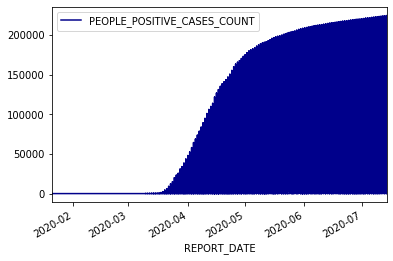

In [37]:
#Let's plot the + cases_count in USA
plot_2 = COVID19USA.plot(x='REPORT_DATE',
                      y='PEOPLE_POSITIVE_CASES_COUNT',
                      c='DarkBlue')

In [38]:
COVID19USA.dtypes

COUNTY_NAME                                object
PEOPLE_POSITIVE_CASES_COUNT                 int64
PROVINCE_STATE_NAME                        object
REPORT_DATE                        datetime64[ns]
CONTINENT_NAME                             object
DATA_SOURCE_NAME                           object
PEOPLE_DEATH_NEW_COUNT                      int64
COUNTRY_ALPHA_3_CODE                       object
COUNTRY_SHORT_NAME                         object
PEOPLE_POSITIVE_NEW_CASES_COUNT             int64
PEOPLE_DEATH_COUNT                          int64
dtype: object

In [46]:
#Checking that all 55 states are represented in the data
statesUSA = sorted(COVID19USA['PROVINCE_STATE_NAME'].unique())
print(len(statesUSA))

55


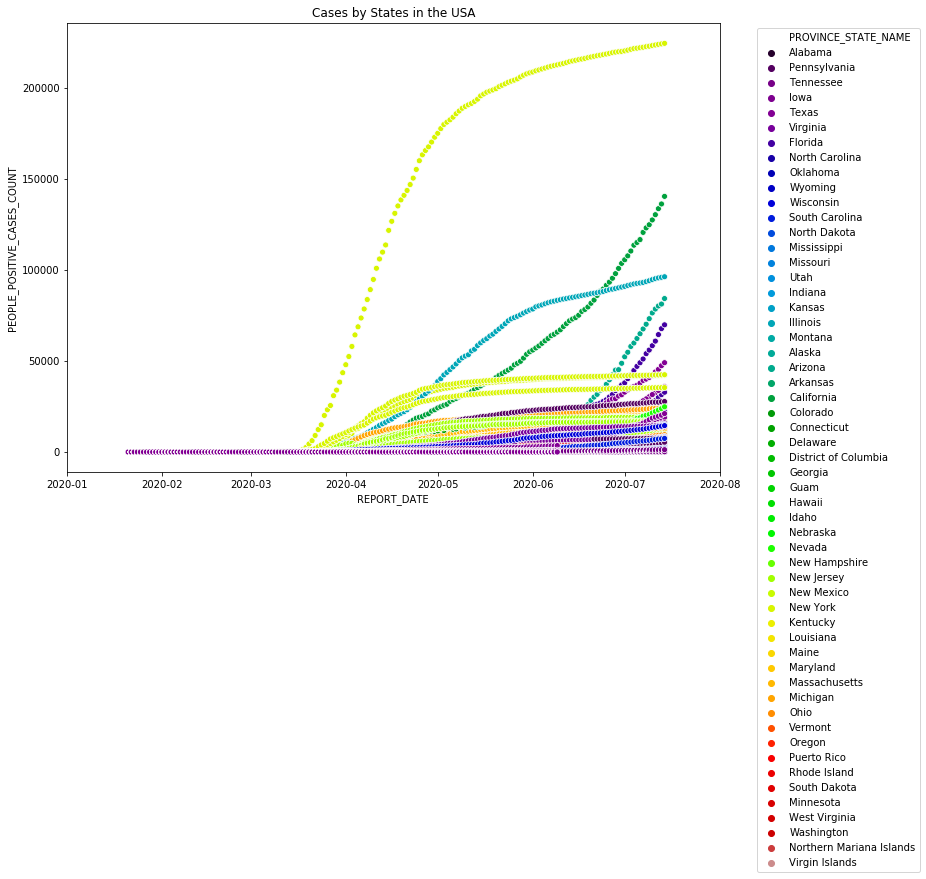

In [43]:
#plot by state
fig, ax = plt.subplots()
#size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=COVID19USA, x="REPORT_DATE", y="PEOPLE_POSITIVE_CASES_COUNT", hue="PROVINCE_STATE_NAME",
                ax=ax, palette='nipy_spectral')
#set limit of the report date on x axis
ax.set(xlim=('2020-01', '2020-08'))
#setting the title of the figure
ax.set(title=("COVID-19 Cases by States in the USA"))
#place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#save file and image, remember to rename file name otherwise, it will rewrite
plt.savefig('COVID_19USA_1.png')
plt.show()

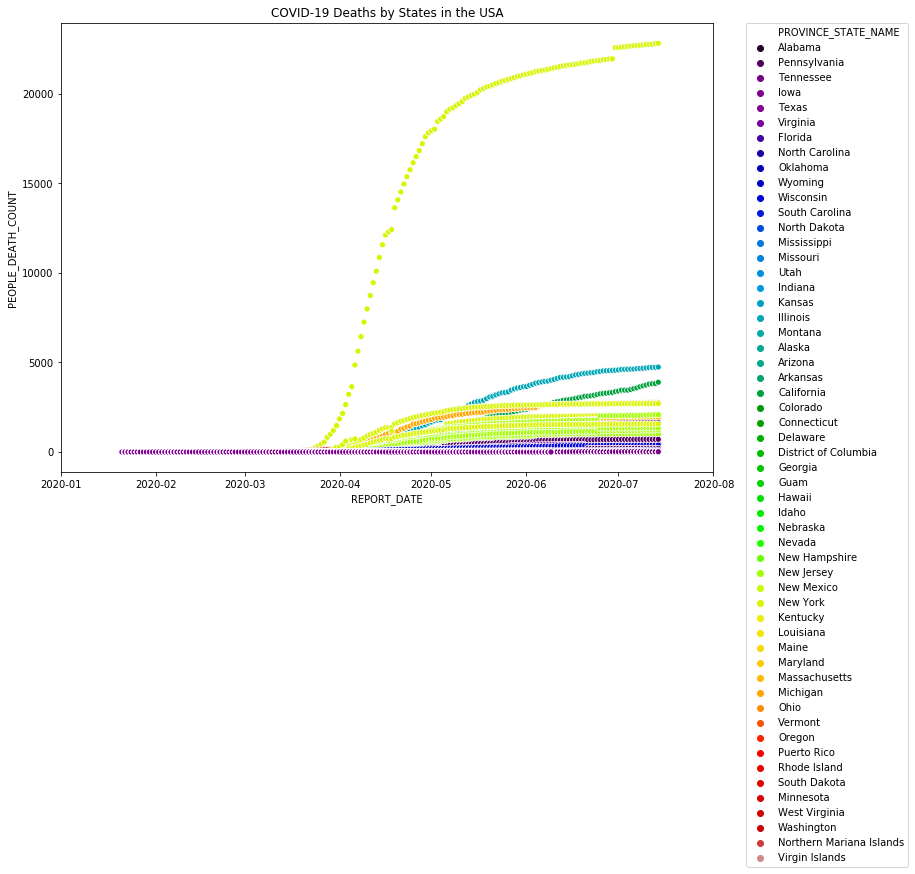

In [54]:
#plot death by state
fig, ax = plt.subplots()
#size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=COVID19USA, x="REPORT_DATE", y="PEOPLE_DEATH_COUNT", hue="PROVINCE_STATE_NAME",
                ax=ax, palette='nipy_spectral')
#set limit of the report date on x axis
ax.set(xlim=('2020-01', '2020-08'))
#setting the title of the figure
ax.set(title=("COVID-19 Deaths by States in the USA"))
#place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#save file and image, remember to rename file name otherwise, it will rewrite
plt.savefig('COVID_19USA_2.png')
plt.show()

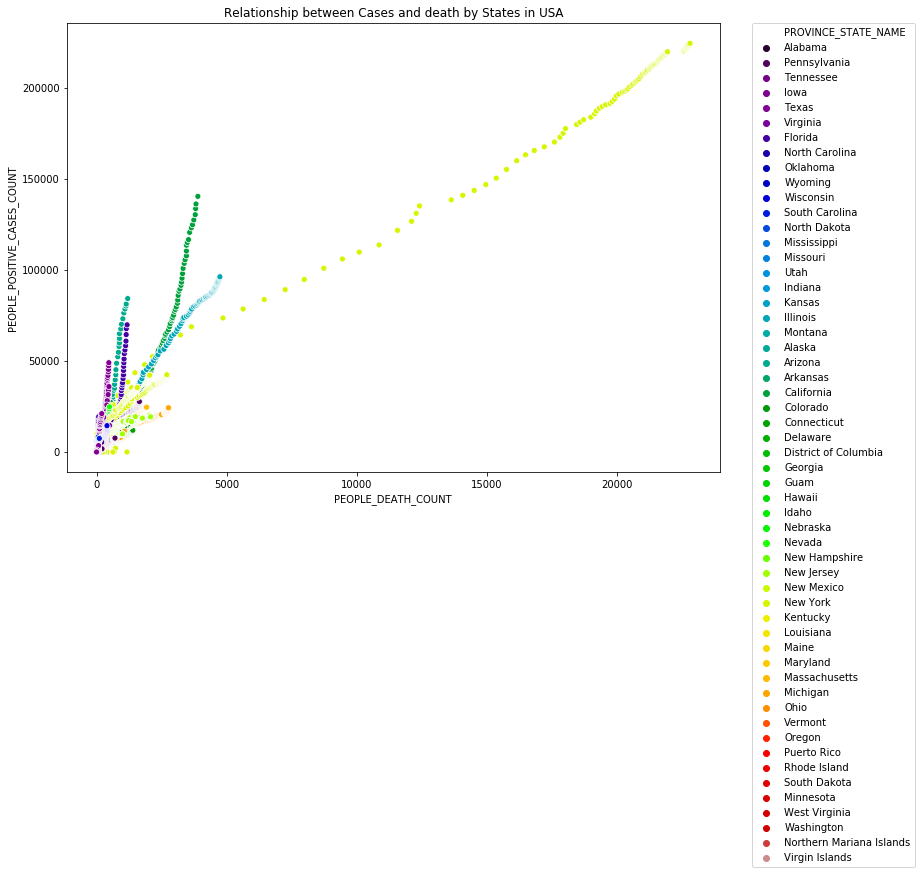

In [56]:
#Linear regression bewtween death and new positiive cases using default
#plot by State
fig, ax = plt.subplots()
#size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=COVID19USA, x="PEOPLE_DEATH_COUNT", y="PEOPLE_POSITIVE_CASES_COUNT", hue="PROVINCE_STATE_NAME", 
                 ax=ax, palette='nipy_spectral')

#setting the title of the figure
ax.set(title=("Relationship between Cases and death by States in USA"))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#save file and image, remember to rename file name otherwise, it will rewrite
plt.savefig('COVID_19USA_3.png')
plt.show()

### The plot like there maybe a linear relationship between the death count and new cases.


# Splitting data into training and test.

In [57]:
#Splitting data into testing and training data for a linear regression model
#I'm spliting data by the ratio of 80:20 (Train : Test) based on the Pareto principle.

splt = np.random.rand(len(COVID19USA)) < 0.8
trainC19_US = COVID19USA[splt]
testC19_US = COVID19USA[~splt]

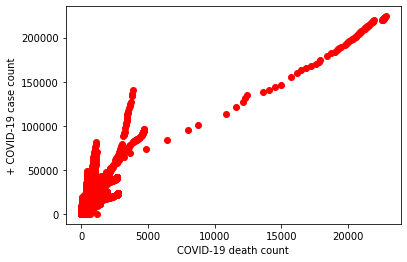

In [58]:
#Visualizing training data
plt.scatter(trainC19_US.PEOPLE_DEATH_COUNT, trainC19_US.PEOPLE_POSITIVE_CASES_COUNT,  color='red')
plt.xlabel("COVID-19 death count")
plt.ylabel("+ COVID-19 case count")
plt.show()

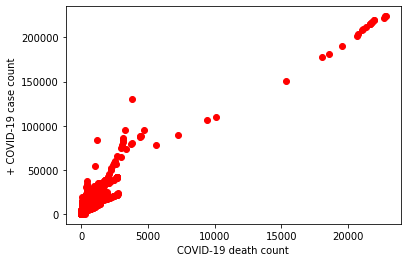

In [59]:
#Visualizing testing data
plt.scatter(testC19_US.PEOPLE_DEATH_COUNT, testC19_US.PEOPLE_POSITIVE_CASES_COUNT,  color='red')
plt.xlabel("COVID-19 death count")
plt.ylabel("+ COVID-19 case count")
plt.show()

# Running the linear regression on the training data

In [62]:
#from sklearn.linear_model import LinearRegression
from sklearn import linear_model
regr2 = linear_model.LinearRegression()
trainC19_US_x = np.asanyarray(trainC19_US[['PEOPLE_DEATH_COUNT']])
trainC19_US_y = np.asanyarray(trainC19_US[['PEOPLE_POSITIVE_CASES_COUNT']])
regr2.fit (trainC19_US_x, trainC19_US_y)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[11.01346939]]
Intercept:  [131.8281655]


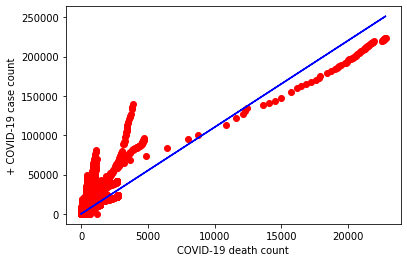

In [63]:
#Visualizing the regression line
#Y=mX+b


plt.scatter(trainC19_US.PEOPLE_DEATH_COUNT, trainC19_US.PEOPLE_POSITIVE_CASES_COUNT,  color='red')
plt.xlabel("COVID-19 death count")
plt.ylabel("+ COVID-19 case count")
plt.plot(trainC19_US_x, regr2.coef_[0][0]*trainC19_US_x + regr2.intercept_[0], '-b')
plt.savefig('COVID_19USA_4.png')
plt.show()

## The slope of the linear regression model on the training data looks really close to a 1

In [65]:
#Calculate the R-square 
from sklearn.metrics import r2_score

testC19_US_x = np.asanyarray(testC19_US[['PEOPLE_DEATH_COUNT']])
testC19_US_y = np.asanyarray(testC19_US[['PEOPLE_POSITIVE_CASES_COUNT']])
testC19_US_y_hat = regr2.predict(testC19_US_x)

print("The mean absolute error: %.2f" % np.mean(np.absolute(testC19_US_y_hat - testC19_US_y)))
print("The residual sum of squares (MSE): %.2f" % np.mean((testC19_US_y_hat - testC19_US_y) ** 2))
print("The R2-score: %.2f" % r2_score(testC19_US_y_hat , testC19_US_y) )

The mean absolute error: 229.43
The residual sum of squares (MSE): 1130264.08
The R2-score: 0.90


## Great! After running this simple linear regression model on the testing data to test the statistical power of the linear relationship between positive COVID-19 cases and COVID-19 deaths, the R-squared, the coefficient of determination, generated is 0.90. This indicates that 90% of the COVID-19 data in the USA and the positive (+) direction of the slopeline explains that there is a positive corealtion between the number of COVID-19 death count and the number COVID-19 total case count. This means that in the USA due to the unknown and known factors in the country as the number of COVID-19 total case count increases, the number of COVID-19 death count increases as well.


## The next step will be to make this model automatically perform this analyis on every country in the COVID19NA.csv on using this simple linear regression model on just data from specific coutries instead of the whole world e.g United States, Canada, Italy etc. This is because, several factors known and unknown has lead to different pattern which is why there is a burst like positive slope between the linear relationship between the death and total cases variable.




# Linear regression of COVID-19 cases in different countries in the world


In [80]:
countries = sorted(COVID19NA['COUNTRY_SHORT_NAME'].unique())
print(countries)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',

In [82]:
print(len(countries))

205


In [81]:
#key and frame to get each country seperate into a df
country = [ frame for country, frame in COVID19NA.groupby('COUNTRY_SHORT_NAME')]
#Here is the one for country 1, country[0], Afganistan
country[0]

,COUNTY_NAME,PEOPLE_POSITIVE_CASES_COUNT,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
521609,NaN,34,NaN,2020-03-23,Asia,European Centre for Disease Prevention and Con...,0,AFG,Afghanistan,10,0
521610,NaN,20917,NaN,2020-06-09,Asia,European Centre for Disease Prevention and Con...,12,AFG,Afghanistan,575,369
521611,NaN,0,NaN,2020-02-21,Asia,European Centre for Disease Prevention and Con...,0,AFG,Afghanistan,0,0
521612,NaN,0,NaN,2020-02-09,Asia,European Centre for Disease Prevention and Con...,0,AFG,Afghanistan,0,0
521613,NaN,0,NaN,2020-02-03,Asia,European Centre for Disease Prevention and Con...,0,AFG,Afghanistan,0,0
...,...,...,...,...,...,...,...,...,...,...,...
560314,NaN,2335,NaN,2020-05-02,Asia,European Centre for Disease Prevention and Con...,4,AFG,Afghanistan,164,68
560315,NaN,7,NaN,2020-03-11,Asia,European Centre for Disease Prevention and Con...,0,AFG,Afghanistan,3,0
560316,NaN,0,NaN,2020-01-11,Asia,European Centre for Disease Prevention and Con...,0,AFG,Afghanistan,0,0
560318,NaN,521,NaN,2020-04-11,Asia,European Centre for Disease Prevention and Con...,0,AFG,Afghanistan,37,15


In [79]:
#Here is the one for country 205, country[204], Zimbabwe
country[204]

,COUNTY_NAME,PEOPLE_POSITIVE_CASES_COUNT,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
522153,NaN,203,NaN,2020-06-02,Africa,European Centre for Disease Prevention and Con...,0,ZWE,Zimbabwe,25,4
522154,NaN,985,NaN,2020-07-13,Africa,European Centre for Disease Prevention and Con...,0,ZWE,Zimbabwe,3,18
522155,NaN,0,NaN,2020-03-09,Africa,European Centre for Disease Prevention and Con...,0,ZWE,Zimbabwe,0,0
522156,NaN,34,NaN,2020-05-06,Africa,European Centre for Disease Prevention and Con...,0,ZWE,Zimbabwe,0,4
522157,NaN,0,NaN,2020-02-19,Africa,European Centre for Disease Prevention and Con...,0,ZWE,Zimbabwe,0,0
...,...,...,...,...,...,...,...,...,...,...,...
559368,NaN,625,NaN,2020-07-04,Africa,European Centre for Disease Prevention and Con...,0,ZWE,Zimbabwe,8,7
560541,NaN,0,NaN,2020-03-17,Africa,European Centre for Disease Prevention and Con...,0,ZWE,Zimbabwe,0,0
560542,NaN,0,NaN,2020-02-13,Africa,European Centre for Disease Prevention and Con...,0,ZWE,Zimbabwe,0,0
560543,NaN,0,NaN,2020-01-22,Africa,European Centre for Disease Prevention and Con...,0,ZWE,Zimbabwe,0,0


In [136]:
from sklearn import linear_model
#def linRegC19_casesbydeath_percountry(COVID19NA):
country = [ frame for country, frame in COVID19NA.groupby('COUNTRY_SHORT_NAME')]
counter = 0
country[counter]
    #splitting the data for each country
splt = np.random.rand(len(country[counter]) < 0.8
train = country[counter][splt]
test = country[counter][~splt]
    #Visualizing training data
plt.scatter(train.PEOPLE_DEATH_COUNT, train.PEOPLE_POSITIVE_CASES_COUNT,  color='red')
plt.xlabel("COVID-19 death count")
plt.ylabel("+ COVID-19 case count")
plt.show()

SyntaxError: invalid syntax (<ipython-input-136-09e2c0ccfee7>, line 8)

In [122]:
    #running the linear regression of the training data for each country
    #regr[counter] = linear_model.LinearRegression(),
    #train_x = np.asanyarray(trainC19_'country[]'[['PEOPLE_DEATH_COUNT']])
    #trainC19_'country[]'_y = np.asanyarray(trainC19_'country[]'[['PEOPLE_POSITIVE_CASES_COUNT']])
    #regr2[].fit (trainC19_'country[]'_x, trainC19_'country[]'_y)
# The coefficients
#print ('Coefficients: ', regr[].coef_)
#print ('Intercept: ',regr[].intercept_)
                              
#counter+=1,

NameError: name 'train' is not defined

In [116]:
counter=0
country[counter]
splt= np.random.rand(len(country[counter]) < 0.8,
train= country[counter][splt],
test= country[counter][~splt]

plt.scatter(train.PEOPLE_DEATH_COUNT, train.PEOPLE_POSITIVE_CASES_COUNT,  color='red')
plt.xlabel("COVID-19 death count")
plt.ylabel("+ COVID-19 case count")
plt.show()

SyntaxError: invalid syntax (<ipython-input-116-842ceedaa8e0>, line 7)

In [115]:
import matplotlib.pyplot as plt

In [69]:
COVID19NA.shape

(609958, 11)

In [83]:
country[204].dtypes

COUNTY_NAME                                object
PEOPLE_POSITIVE_CASES_COUNT                 int64
PROVINCE_STATE_NAME                        object
REPORT_DATE                        datetime64[ns]
CONTINENT_NAME                             object
DATA_SOURCE_NAME                           object
PEOPLE_DEATH_NEW_COUNT                      int64
COUNTRY_ALPHA_3_CODE                       object
COUNTRY_SHORT_NAME                         object
PEOPLE_POSITIVE_NEW_CASES_COUNT             int64
PEOPLE_DEATH_COUNT                          int64
dtype: object

In [71]:
for country, COVID_19_country in COVID19NA.groupby('COUNTRY_SHORT_NAME'):
    print(COVID_19_country)

       COUNTY_NAME  PEOPLE_POSITIVE_CASES_COUNT PROVINCE_STATE_NAME  \
521609         NaN                           34                 NaN   
521610         NaN                        20917                 NaN   
521611         NaN                            0                 NaN   
521612         NaN                            0                 NaN   
521613         NaN                            0                 NaN   
...            ...                          ...                 ...   
560314         NaN                         2335                 NaN   
560315         NaN                            7                 NaN   
560316         NaN                            0                 NaN   
560318         NaN                          521                 NaN   
560319         NaN                        28833                 NaN   

       REPORT_DATE CONTINENT_NAME  \
521609  2020-03-23           Asia   
521610  2020-06-09           Asia   
521611  2020-02-21           Asia   

[198 rows x 11 columns]
       COUNTY_NAME  PEOPLE_POSITIVE_CASES_COUNT PROVINCE_STATE_NAME  \
521824         NaN                            0                 NaN   
521825         NaN                          221                 NaN   
521826         NaN                         3613                 NaN   
521827         NaN                            0                 NaN   
521828         NaN                           19                 NaN   
...            ...                          ...                 ...   
560367         NaN                            5                 NaN   
560368         NaN                         2222                 NaN   
560369         NaN                            0                 NaN   
560370         NaN                           14                 NaN   
560371         NaN                            0                 NaN   

       REPORT_DATE CONTINENT_NAME  \
521824  2020-02-26         Africa   
521825  2020-05-15         Africa   
521826  2020

[198 rows x 11 columns]
       COUNTY_NAME  PEOPLE_POSITIVE_CASES_COUNT PROVINCE_STATE_NAME  \
521761         NaN                       174355                 NaN   
521762         NaN                       190862                 NaN   
521763         NaN                        91714                 NaN   
521764         NaN                        52547                 NaN   
521765         NaN                         2369                 NaN   
...            ...                          ...                 ...   
560441         NaN                       189822                 NaN   
560442         NaN                           15                 NaN   
560443         NaN                           15                 NaN   
560444         NaN                          684                 NaN   
560447         NaN                       181815                 NaN   

       REPORT_DATE CONTINENT_NAME  \
521761  2020-05-17         Europe   
521762  2020-06-23         Europe   
521763  2020

[198 rows x 11 columns]
       COUNTY_NAME  PEOPLE_POSITIVE_CASES_COUNT PROVINCE_STATE_NAME  \
521721         NaN                            0                 NaN   
522857         NaN                            0                 NaN   
522858         NaN                            0                 NaN   
524120         NaN                            0                 NaN   
524121         NaN                            0                 NaN   
...            ...                          ...                 ...   
560412         NaN                            1                 NaN   
560413         NaN                            4                 NaN   
560414         NaN                            0                 NaN   
560415         NaN                            0                 NaN   
560416         NaN                            0                 NaN   

       REPORT_DATE CONTINENT_NAME  \
521721  2020-02-10         Africa   
522857  2020-05-09         Africa   
522858  2020

[198 rows x 11 columns]
       COUNTY_NAME  PEOPLE_POSITIVE_CASES_COUNT PROVINCE_STATE_NAME  \
522311         NaN                            8                 NaN   
522312         NaN                           11                 NaN   
522313         NaN                           11                 NaN   
522314         NaN                            1                 NaN   
522315         NaN                            2                 NaN   
...            ...                          ...                 ...   
561166         NaN                            0                 NaN   
561167         NaN                            8                 NaN   
561168         NaN                            0                 NaN   
561169         NaN                            0                 NaN   
561170         NaN                            0                 NaN   

       REPORT_DATE CONTINENT_NAME  \
522311  2020-05-09        Oceania   
522312  2020-06-27        Oceania   
522313  2020

       COUNTY_NAME  PEOPLE_POSITIVE_CASES_COUNT PROVINCE_STATE_NAME  \
521903         NaN                            0                 NaN   
521904         NaN                          576                 NaN   
521905         NaN                          443                 NaN   
521906         NaN                            0                 NaN   
521907         NaN                          354                 NaN   
...            ...                          ...                 ...   
561221         NaN                            0                 NaN   
561222         NaN                           23                 NaN   
561223         NaN                            0                 NaN   
561224         NaN                           34                 NaN   
561225         NaN                            0                 NaN   

       REPORT_DATE CONTINENT_NAME  \
521903  2020-02-20         Africa   
521904  2020-06-24         Africa   
521905  2020-06-02         Africa   